## Stochastic Gradient Descent

The following example was initially designed as an old classroom experiment, where one might need to fit a logistic regression with online learning where some of the weights are fixed.

### Example implementation and usage

#### Logistic Regression with SGD
The sigmoid function is the main structure for the logistic regression. It is bounded by $(0,1)$ and is written as: $$\sigma(x) = \frac{1}{(1 + e^{x})}$$

The cost function for the logistic regression is the log-loss or cross-entropy. It is given by: $$J(\Theta) = - \frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)} \cdot \log \hat{y}^{(i)} + (1 - y^{(i)})\cdot\log(1 - \hat{y}^{(i)})\right)$$

To minimize the cost value at each iteration, one might use gradient descent, such as:

$$\Theta_{j} := \Theta_{j} - \alpha \frac{\partial}{\partial \Theta_{j}}J(\Theta)$$
The derivative term results in:

$$\frac{\partial J(\Theta)}{\partial \Theta_{j}} = ... = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)x_{j}^{(i)}$$
Which leads to the following algorithm, used to estimate and update the all the $\Theta_{j}$ parameters (weights).

$$\Theta_{j} := \Theta_{j} - \frac{\alpha}{m} \sum_{i=1}^{m}\left(\hat{y}^{(i)} - y^{(i)}\right)x_{j}^{(i)}$$
Because the weights are updated at each step, to fix some of the weights one might need to indicate the indices referring to those weights and overwrite at each iteration the updated weights with the fixed values.

The code shown below was designed only to illustrate the idea and does not represent an optimized script! Use carefully...

### Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import KFold, train_test_split
from sklearn import metrics
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Load data

In [3]:
data = load_breast_cancer()

### Prepare data

#### Features and target data

In [4]:
X = data['data']
y = data['target']
print(X.shape, y.shape)
print(y.mean())

(569, 30) (569,)
0.6274165202108963


#### Split train and test data
The approach shown below is only for illustration purposes. It is a naive approach. If we want to have an optimal model development we should use something like early stopping or a KFold approach.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()

X_train_preproc = scaler.fit_transform(X_train)
X_test_preproc = scaler.transform(X_test)

In [6]:
from sgd import LogisticRegressionModel

#### Instantiate model

In [7]:
fixed_weights = [1.9, 0.5, 0.3] # the convergence of the method is sensitive to these values
fixed_mask = [0, 2, 4]

lr = LogisticRegressionModel(n_iter=1000,
                             stochastic=True, 
                             fixed_weights=fixed_weights,
                             fixed_mask=fixed_mask)

In [8]:
lr.fixed_mask

[0, 2, 4]

In [9]:
lr.fixed_weights

[1.9, 0.5, 0.3]

#### Random initial guess for weight vector

In [10]:
theta0 = np.random.randn(X.shape[1])
theta0 = theta0.reshape(-1,1)
theta0[:20]

array([[-0.07230447],
       [-0.36866222],
       [ 0.57684659],
       [ 0.14852872],
       [-0.13530868],
       [ 0.58381495],
       [ 0.12563985],
       [ 1.37204965],
       [ 1.64106617],
       [ 1.09900995],
       [-0.32454951],
       [ 0.0757528 ],
       [-0.24485212],
       [-0.8884385 ],
       [-0.13048095],
       [ 0.03245929],
       [-1.50538826],
       [-0.46100606],
       [-1.27729236],
       [-0.88972177]])

#### Train model

In [11]:
lr.fit(X_train_preproc, y_train, theta0)

#### Verify coefficients

In [12]:
for i in [0, 1, 100, 500, 999]:
    print(f'Iteration number {i + 1}:') 
    print(lr.coefs_[i])
    print()

Iteration number 1:
[[ 1.9        -0.37004677  0.5         0.14293192  0.3         0.57927542
   0.12085795  1.36598503  1.63802903  1.09917511 -0.32874134  0.07718186
  -0.2488647  -0.89264121 -0.12955331  0.03140025 -1.506115   -0.46355421
  -1.27653647 -0.88933061  0.08986173 -0.75803608  1.19070454  1.18722558
   1.43101988 -1.78405096 -1.24363046 -0.42076556  0.31779216  0.52646904]]

Iteration number 2:
[[ 1.9        -0.37140208  0.5         0.13735902  0.3         0.57476664
   0.11610891  1.35995234  1.63500673  1.09934651 -0.33290791  0.07861832
  -0.25285056 -0.89682113 -0.12862727  0.03036613 -1.50682029 -0.4660732
  -1.27576919 -0.88892818  0.08382686 -0.75989913  1.18469354  1.18158342
   1.42690673 -1.78803188 -1.24784755 -0.42680603  0.31443683  0.52449277]]

Iteration number 101:
[[ 1.9        -0.41721853  0.5        -0.27350738  0.3         0.29227169
  -0.18378884  0.93517243  1.42919555  1.14935883 -0.59391393  0.23624311
  -0.49046106 -1.16883646 -0.03136859  0.0485

#### Optimum weights

In [13]:
lr.coefs_opt_st[:20]

array([[ 1.9       ],
       [-0.32402402],
       [ 0.5       ],
       [-0.95164708],
       [ 0.3       ],
       [ 0.0395976 ],
       [-0.32877226],
       [ 0.26224255],
       [ 0.9398698 ],
       [ 1.38918388],
       [-0.96668489],
       [ 0.62789505],
       [-0.73705799],
       [-1.58223619],
       [ 0.05130188],
       [ 0.77175319],
       [-0.58876589],
       [-0.20843413],
       [-0.82089719],
       [-0.02178471]])

#### Predict on test data
The first 20 results are shown below.


In [14]:
lr.predict(X_test_preproc)[:20]

array([[9.52850397e-01],
       [9.59769838e-01],
       [9.62667511e-01],
       [8.32398012e-02],
       [9.83803313e-01],
       [9.97612881e-01],
       [9.97161054e-01],
       [2.48465910e-05],
       [9.68947700e-01],
       [9.89095890e-01],
       [2.90280385e-01],
       [9.50961968e-01],
       [8.89242575e-01],
       [9.94163385e-01],
       [8.23174966e-03],
       [9.97333902e-01],
       [7.96007564e-01],
       [8.90357545e-01],
       [2.74798723e-05],
       [9.62108079e-02]])

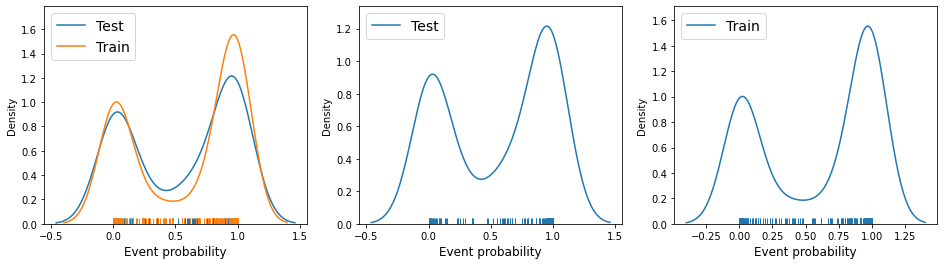

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(16,4))

ax = ax.ravel()

sns.distplot(lr.predict(X_test_preproc), hist=False, rug=True, ax=ax[0])
sns.distplot(lr.predict(X_train_preproc), hist=False, rug=True, ax=ax[0])
ax[0].legend(['Test', 'Train'], fontsize=14)

sns.distplot(lr.predict(X_test_preproc), hist=False, rug=True, ax=ax[1])
ax[1].legend(['Test'], fontsize=14)

sns.distplot(lr.predict(X_train_preproc), hist=False, rug=True, ax=ax[2])
ax[2].legend(['Train'], fontsize=14)

for i in range(3):
    ax[i].set_xlabel('Event probability', fontsize=12)

#### Costs

In [16]:
for i in [0, 1, 100, 500, 999]:
    print(f'Iteration number {i}: {lr.costs_[i]}')

Iteration number 0: 268.0120567507864
Iteration number 1: 265.6382710167389
Iteration number 100: 104.66235733823545
Iteration number 500: 31.375318162402884
Iteration number 999: 15.912869449816096


#### Compare costs

In [17]:
fixed_weights = [1.9, 0.5, 0.3] #the convergence of the method is sensitive to these values
fixed_mask = [0, 2, 4]

stochastic = [True, False]
iterations = 1000
all_costs = {}

for i, s in enumerate(stochastic):

    lr = LogisticRegressionModel(n_iter=iterations,
                                 stochastic=s, 
                                 fixed_weights=fixed_weights,
                                 fixed_mask=fixed_mask)

    lr.fit(X_train_preproc, y_train, theta0)

    all_costs[i] = lr.costs_

Text(0.5, 0, 'Iterations')

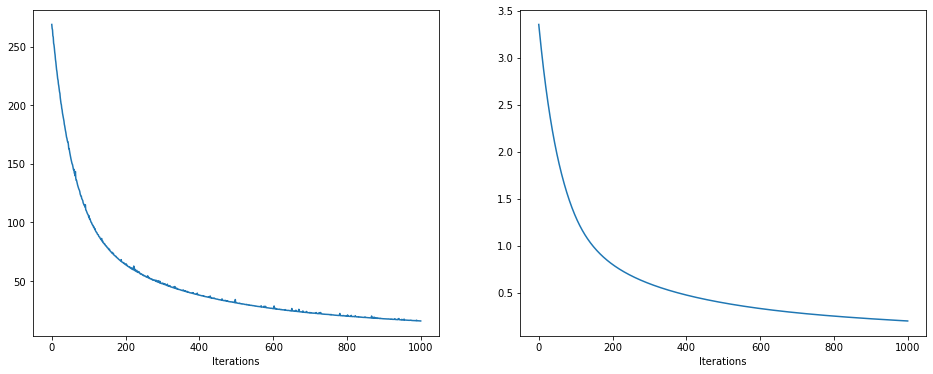

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax = ax.ravel()

x_ = np.arange(0, iterations, 1)

ax[0].plot(x_, all_costs[0].values())
ax[1].plot(x_, all_costs[1].values())
ax[0].set_xlabel("Iterations")
ax[1].set_xlabel("Iterations")